In [161]:
from environment import * 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import re

In [206]:
first_time="6:30"
last_time="22:00"
max_capacity = 47
trf_path="data/line3/traffic-1.csv"
passenger_info_path = "data/line3/passenger_dataframe_direction1.csv"
trf_con = pd.DataFrame(pd.read_csv(trf_path))
first_minute_th = (int(first_time[:-3]) - int(trf_con.iloc[0, 0])) * 60 + (int(first_time[-2:]) - int(trf_con.iloc[0, 1]))
last_minute_th = (int(last_time[:-3]) - int(trf_con.iloc[0, 0])) * 60 + (int(last_time[-2:]) - int(trf_con.iloc[0, 1]))
current_minute_th = first_minute_th
passenger_columns = ['Label', 'Boarding time', 'Boarding station', 'Alighting station','Arrival time']
bus_image = mpimg.imread('busImage.png')
rewards = []

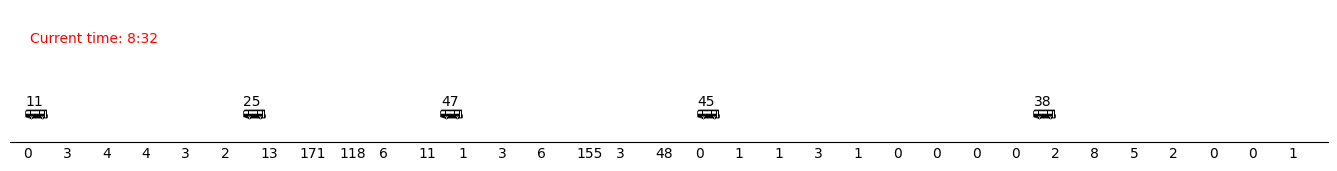

In [328]:
Line = BusLine(passenger_info_path,trf_path,first_minute_th,last_minute_th,max_capacity,1)
reward,new_state = Line.update_environment(1)

current_minute = first_minute_th
current_time = f"{Line.current_minute//60}:{Line.current_minute%60}"

fig, ax = plt.subplots(figsize=(17,5))

while current_minute<last_minute_th:
    #action = get_action(state)
    reward,new_state = Line.update_environment(1)
    logger.debug(f"Reward = {reward} New state = {new_state}")
    current_minute+=1
    rewards.append(reward)
passengers = [ len(x) for x in Line.stations.current_minute_passengers]
ax.set_xlim(-1,3*len(passengers))
ax.set_ylim(0,10)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])

for x, text in enumerate(passengers):
    ax.text(3*x,-1.25,text)

ax.text(0.5,7.5,f"Current time: {current_time}",color='red')

if len(Line.buses_on_road)!= 0:
    for bus in Line.buses_on_road:
        if bus.arrv_mark!=1:
            num_passengers = len(bus.passengers_on)
            state_str = re.findall(r'\d+', bus.state_str)
            if len(state_str)==1:
                position = int(state_str[0])
            else:
                position = (int(state_str[0]) +  int(state_str[1]))/2
            
            ax.text(3*position+0.2, 2.7, str(num_passengers))
            ax.imshow(bus_image,extent=[3*position, 3*position+2, 1,3])
plt.show()

In [58]:
re.findall(r'\d+', Line.buses_on_road[0].state_str)

['0']

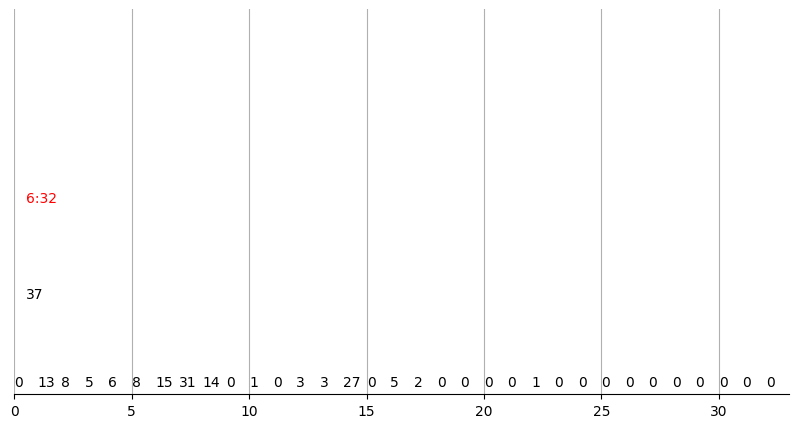